In [77]:
# Import Python Libraries
import pandas as pd
import numpy as np
#import tensorflow 
#import fancyimpute
#import msg
from scipy.stats import chi2_contingency
import seaborn as sns
#from fancyimpute import KNN
import matplotlib.pyplot as plt

In [78]:
train=pd.read_csv("train.csv")
train.shape

(3333, 21)

In [79]:
test=pd.read_csv("test.csv")
test.shape

(1667, 21)

In [80]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
scipy: 1.1.0
numpy: 1.15.4
matplotlib: 3.0.2
pandas: 0.23.4
sklearn: 0.20.1


In [81]:
data=pd.concat([train,test],axis=0)
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [82]:
data.shape

(5000, 21)

# Missing Value treatment

In [83]:
data.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

# Encoding Variable

In [84]:
#Assigning levels to the categories
lis = []
for i in range(0, data.shape[1]):
    if(data.iloc[:,i].dtypes == 'object'):
        data.iloc[:,i] = pd.Categorical(data.iloc[:,i])
        data.iloc[:,i] = data.iloc[:,i].cat.codes 
        data.iloc[:,i] = data.iloc[:,i].astype('object')
        lis.append(data.columns[i])
        

In [85]:
data.head(20)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,1,118,510,3355,1,0,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,19,121,510,1516,0,1,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,24,147,415,116,1,0,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,18,117,408,425,0,0,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,49,141,415,163,1,1,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


# Outlier Analysis

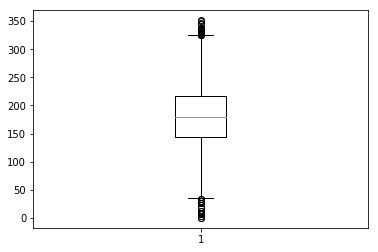

In [86]:
%matplotlib inline
plt.boxplot(data['total day minutes'])
plt.show()


In [87]:
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,436.911400,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,42.209182,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,408.000000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,415.000000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,415.000000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,510.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [88]:

data.dtypes

state                             object
account length                     int64
area code                          int64
phone number                      object
international plan                object
voice mail plan                   object
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                             object
dtype: object

In [89]:
cnames=["account length","area code","number vmail messages","total day calls","total day minutes","total day charge","total eve minutes","total eve calls","total eve charge","total night minutes","total night charge","total night calls","total intl minutes","total intl calls","total intl charge","number customer service calls"]

In [90]:
cnames

['account length',
 'area code',
 'number vmail messages',
 'total day calls',
 'total day minutes',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night charge',
 'total night calls',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'number customer service calls']

In [91]:
for i in cnames:
    print(i)
    q75, q25=np.percentile(data.loc[:,i],[75,25])
    iqr=q75-q25
    
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    
    print(min)
    print(max)
    
    data=data.drop(data[data.loc[:,i]<min].index)
    data=data.drop(data[data.loc[:,i]>max].index)
    

account length
-8.0
208.0
area code
397.5
425.5
number vmail messages
-25.5
42.5
total day calls
49.0
153.0
total day minutes
34.01250000000006
325.51249999999993
total day charge
5.954999999999998
55.19500000000001
total eve minutes
66.10000000000002
334.9
total eve calls
48.0
152.0
total eve charge
5.715000000000002
28.395
total night minutes
63.825000000000074
337.2249999999999
total night charge
2.9400000000000013
15.099999999999998
total night calls
45.5
153.5
total intl minutes
3.499999999999999
17.1
total intl calls
-1.5
10.5
total intl charge
0.9700000000000002
4.65
number customer service calls
-0.5
3.5


In [92]:
#Detected outlier replace with NA


In [93]:
data.head(20)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
7,24,147,415,116,1,0,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
11,39,74,415,916,0,0,0,187.7,127,31.91,...,148,13.89,196.0,94,8.82,9.1,5,2.46,0,0
12,12,168,408,1854,0,0,0,128.8,96,21.90,...,71,8.92,141.1,128,6.35,11.2,2,3.02,1,0
16,13,85,408,1218,0,1,27,196.4,139,33.39,...,90,23.88,89.3,75,4.02,13.8,4,3.73,1,0
20,9,147,415,3606,0,0,0,155.1,117,26.37,...,93,20.37,208.8,133,9.40,10.6,4,2.86,0,0
23,40,111,415,1186,0,0,0,110.4,103,18.77,...,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
25,29,174,415,182,0,0,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,0
26,50,57,408,1584,0,1,39,213.0,115,36.21,...,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0


# Feature Selection


In [94]:
##Correlation analysis
#Correlation plot
df_corr = data.loc[:,cnames]
df_corr

,account length,area code,number vmail messages,total day calls,total day minutes,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night charge,total night calls,total intl minutes,total intl calls,total intl charge,number customer service calls
2,137,415,0,114,243.4,41.38,121.2,110,10.30,162.6,7.32,104,12.2,5,3.29,0
4,75,415,0,113,166.7,28.34,148.3,122,12.61,186.9,8.41,121,10.1,3,2.73,3
7,147,415,0,79,157.0,26.69,103.1,94,8.76,211.8,9.53,96,7.1,6,1.92,0
11,74,415,0,127,187.7,31.91,163.4,148,13.89,196.0,8.82,94,9.1,5,2.46,0
12,168,408,0,96,128.8,21.90,104.9,71,8.92,141.1,6.35,128,11.2,2,3.02,1
16,85,408,27,139,196.4,33.39,280.9,90,23.88,89.3,4.02,75,13.8,4,3.73,1
20,147,415,0,117,155.1,26.37,239.7,93,20.37,208.8,9.40,133,10.6,4,2.86,0
23,111,415,0,103,110.4,18.77,137.3,102,11.67,189.6,8.53,105,7.7,6,2.08,2
25,174,415,0,76,124.3,21.13,277.1,112,23.55,250.7,11.28,115,15.5,5,4.19,3
26,57,408,39,115,213.0,36.21,191.1,112,16.24,182.7,8.22,115,9.5,3,2.57,0


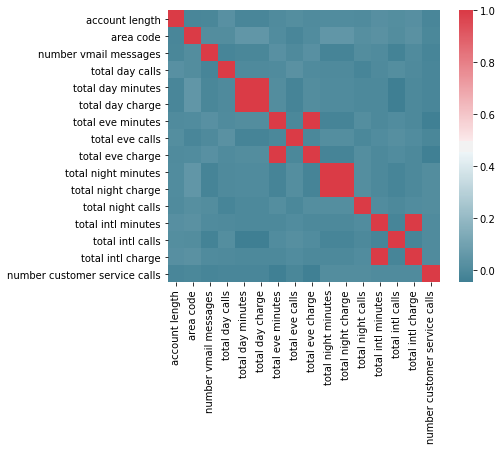

In [95]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [96]:
data.dtypes

state                             object
account length                     int64
area code                          int64
phone number                      object
international plan                object
voice mail plan                   object
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                             object
dtype: object

In [97]:
#Chisquare test of independence
#Save categorical variables
cat_names = ["state","phone number","international plan","voice mail plan"]

In [98]:
cat_names

['state', 'phone number', 'international plan', 'voice mail plan']

In [99]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(data['Churn'], data[i]))
    print(p)

state
0.04290387594575878
phone number
0.4902048104570892
international plan
2.223808093710486e-39
voice mail plan
2.8784921435867393e-06


In [100]:
data = data.drop(['phone number'], axis=1)

In [101]:
data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
7,24,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
11,39,74,415,0,0,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,0
12,12,168,408,0,0,0,128.8,96,21.90,104.9,71,8.92,141.1,128,6.35,11.2,2,3.02,1,0


# Feature  Scalling

(array([536.,   0.,   0.,   0.,   0.,   0., 892.,   0.,   0.,   0.,   0.,
          0.,   0., 562.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0.  , 0.15, 0.3 , 0.45, 0.6 , 0.75, 0.9 , 1.05, 1.2 , 1.35, 1.5 ,
        1.65, 1.8 , 1.95, 2.1 , 2.25, 2.4 , 2.55, 2.7 , 2.85, 3.  ]),
 <a list of 20 Patch objects>)

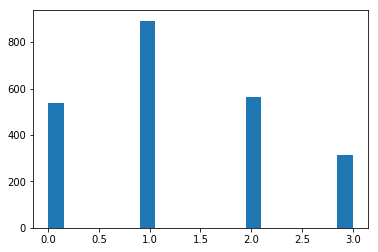

In [102]:
#Normality check
%matplotlib inline  
plt.hist(data['number customer service calls'], bins='auto')

In [103]:
data.dtypes

state                             object
account length                     int64
area code                          int64
international plan                object
voice mail plan                   object
number vmail messages              int64
total day minutes                float64
total day calls                    int64
total day charge                 float64
total eve minutes                float64
total eve calls                    int64
total eve charge                 float64
total night minutes              float64
total night calls                  int64
total night charge               float64
total intl minutes               float64
total intl calls                   int64
total intl charge                float64
number customer service calls      int64
Churn                             object
dtype: object

In [104]:
data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
7,24,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
11,39,74,415,0,0,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,0
12,12,168,408,0,0,0,128.8,96,21.90,104.9,71,8.92,141.1,128,6.35,11.2,2,3.02,1,0


In [105]:
colnames=["account length","area code","total day minutes","total day calls","total day charge","total eve minutes","total eve calls","total eve charge","total night minutes","total night charge","total night calls","total intl calls","total intl charge","total intl minutes","number customer service calls"]

In [106]:
data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
7,24,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
11,39,74,415,0,0,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,0
12,12,168,408,0,0,0,128.8,96,21.90,104.9,71,8.92,141.1,128,6.35,11.2,2,3.02,1,0


# Standardization

In [107]:
#for i in cnames:
#    print(i)
 #   data[i]=(data[i]-min*(data[i]))/(max*(data[i])-min*(data[i]))

In [108]:
data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
7,24,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
11,39,74,415,0,0,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,0
12,12,168,408,0,0,0,128.8,96,21.90,104.9,71,8.92,141.1,128,6.35,11.2,2,3.02,1,0


In [109]:
# #Standarisation
for i in cnames:
    print(i)
    data[i] = (data[i] - data[i].mean())/data[i].std()

account length
area code
number vmail messages
total day calls
total day minutes
total day charge
total eve minutes
total eve calls
total eve charge
total night minutes
total night charge
total night calls
total intl minutes
total intl calls
total intl charge
number customer service calls


In [110]:
data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
2,31,0.939384,0.711792,0,0,-0.567962,1.205789,0.698101,1.205958,-1.654223,0.532201,-1.654755,-0.772602,0.215998,-0.771278,0.729320,0.330358,0.722659,-1.323113,0
4,36,-0.646851,0.711792,1,0,-0.567962,-0.254605,0.646147,-0.254560,-1.094250,1.167176,-1.093203,-0.281738,1.110121,-0.281998,-0.107490,-0.638020,-0.103940,1.768624,0
7,24,1.195229,0.711792,1,0,-0.567962,-0.439296,-1.120267,-0.439365,-2.028228,-0.314433,-2.029123,0.221246,-0.204766,0.220748,-1.302932,0.814548,-1.299556,-1.323113,0
11,39,-0.672435,0.711792,0,0,-0.567962,0.145242,1.373495,0.145290,-0.782235,2.542955,-0.782040,-0.097916,-0.309957,-0.097957,-0.505970,0.330358,-0.502478,-1.323113,0
12,12,1.732502,-1.404296,0,0,-0.567962,-0.976234,-0.237060,-0.975859,-1.991034,-1.531469,-1.990228,-1.206906,1.478290,-1.206692,0.330839,-1.122210,0.324120,-0.292534,0


In [111]:
import sklearn
from sklearn import preprocessing

In [112]:
data.shape

(2304, 20)

# Model Development

In [113]:
#Import Libraries for decision tree
from sklearn import tree
import sklearn
from sklearn.metrics import accuracy_score
#import sklearn.cross_validation 
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [114]:
#replace target categories with Yes or No
data['Churn'] = data['Churn'].replace(0, 'No')
data['Churn'] = data['Churn'].replace(1, 'Yes')

In [115]:
#Divide data into train and test
X = data.values[:, 0:19]
Y = data.values[:,19]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [116]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train, y_train)
RF_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [117]:
RF_Predictions = RF_model.predict(X_test)

In [118]:
RF_Predictions

array(['No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', '

In [119]:
#build confusion matrix
import sklearn.metrics
from sklearn.metrics import confusion_matrix 
CM =pd.crosstab(y_test, RF_Predictions)


In [120]:
CM

col_0,No,Yes
row_0,,
No,422,1
Yes,17,21


In [121]:

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [122]:
#check accuracy of model
((TP+TN)*100)/(TP+TN+FP+FN)

96.09544468546638

In [123]:
#Decision Tree
#C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
#C50_model

#predict new test cases
#C50_Predictions = C50_model.predict(X_test)
#C50_Predictions



In [124]:
#Create dot file to visualise tree  #http://webgraphviz.com/
#dotfile = open("pt.dot", 'w')
#df = tree.export_graphviz(C50_model, out_file=dotfile)

In [125]:
#CM = pd.crosstab(y_test, C50_Predictions)
#CM

In [126]:
#let us save TP, TN, FP, FN
#TN = CM.iloc[0,0]
#FN = CM.iloc[1,0]
#TP = CM.iloc[1,1]
#FP = CM.iloc[0,1]

In [127]:
#check accuracy of model
#((TP+TN)*100)/(TP+TN+FP+FN)
